In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/content/sample_data/HR-Employee-Attrition.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


EDA (Exploratory Data Analysis)

In [5]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


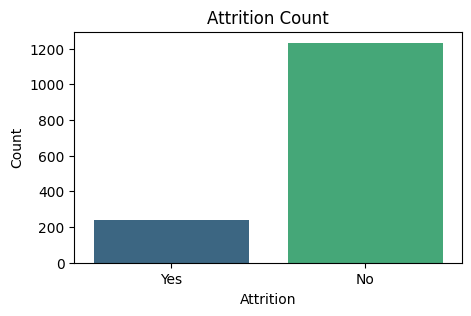

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Attrition', hue='Attrition', palette='viridis', legend='auto')
plt.title("Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

To Filter Numerical Features in the Dataset

In [11]:
num_features = df.select_dtypes(include=['int64','float64']).columns
print(num_features)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [12]:
numerical_features = ['Age','MonthlyIncome','YearsAtCompany','TotalWorkingYears','DistanceFromHome']

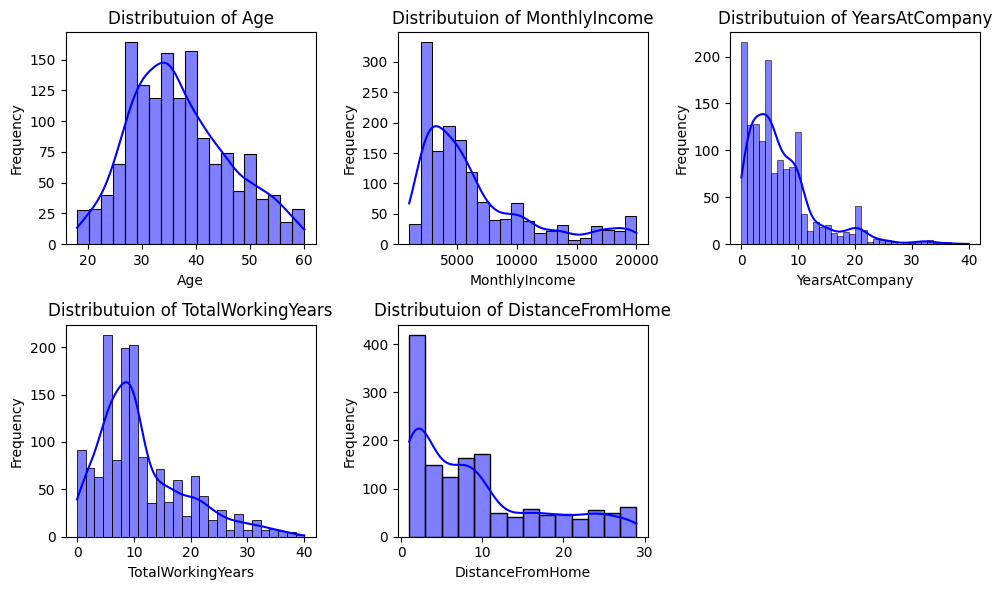

In [13]:
plt.figure(figsize=(10,6))
for i, col in enumerate(numerical_features):
  plt.subplot(2,3,i+1)
  sns.histplot(data=df, x=col, kde=True, color='blue')
  plt.title(f'Distributuion of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Explore relationship with Attrition target variable

/tmp/ipython-input-3643898601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')
/tmp/ipython-input-3643898601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')
/tmp/ipython-input-3643898601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')
/tmp/ipython-input-3643898601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

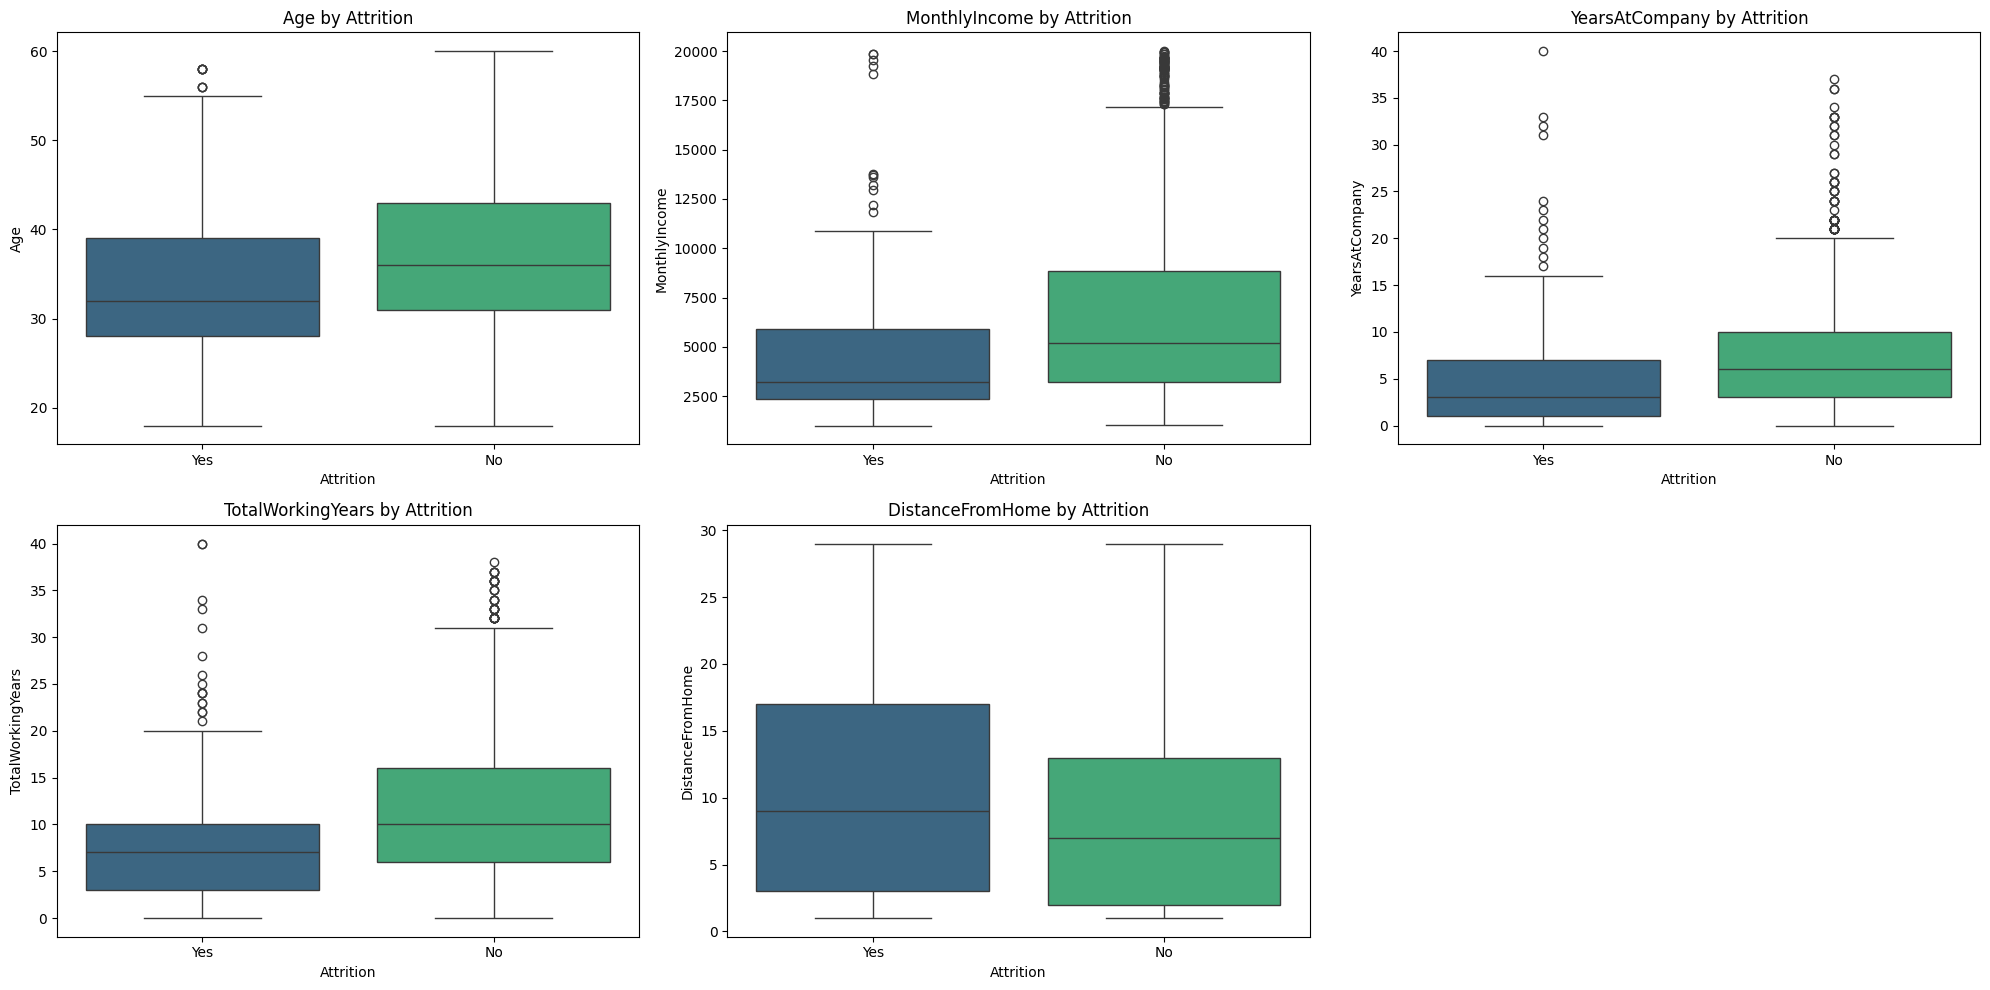

In [14]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='Attrition', y=col, palette='viridis')
    plt.title(f'{col} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [15]:
cat_features = df.select_dtypes(include=['object']).columns

In [16]:
print(cat_features)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [17]:
categorical_features = ['BusinessTravel','Department','EducationField','Gender','MaritalStatus','OverTime','JobRole']

/tmp/ipython-input-1567515288.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=df, x=col, hue='Attrition', color='blue')
/tmp/ipython-input-1567515288.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=df, x=col, hue='Attrition', color='blue')
/tmp/ipython-input-1567515288.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=df, x=col, hue='Attrition', color='blue')
/tmp/ipython-input-1567515288.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=df, x=col, hue='Attrition', color='blue')


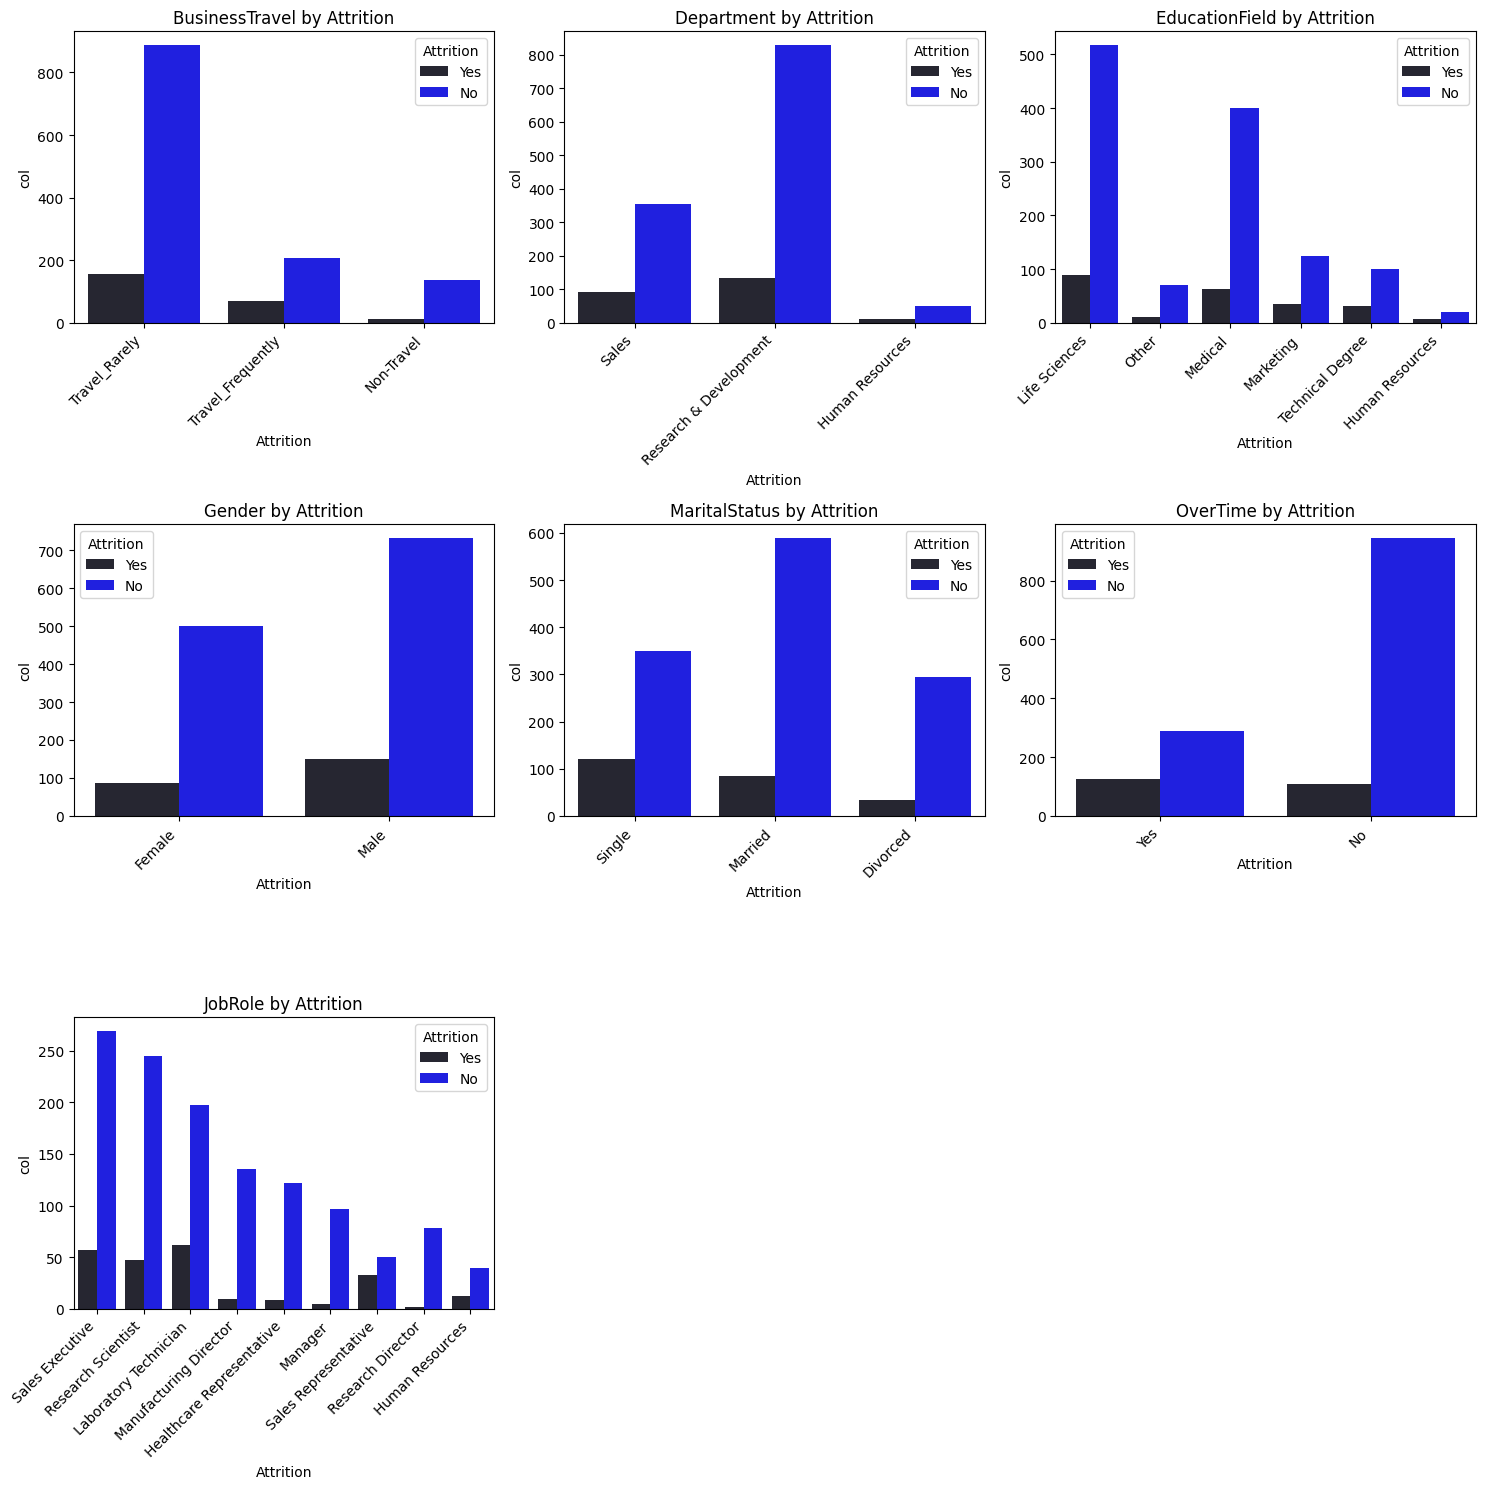

In [18]:
plt.figure(figsize=(15,15))
for i, col in enumerate(categorical_features):
  plt.subplot(3,3,i+1)
  sns.countplot(data=df, x=col, hue='Attrition', color='blue')
  plt.title(f'{col} by Attrition')
  plt.xlabel('Attrition')
  plt.ylabel('col')
  plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Data Preprocessing

In [20]:
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns = columns_to_drop)

In [21]:
print(columns_to_drop)

['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']


Attrition column converted to numerical:

In [22]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [23]:
print(df['Attrition'].value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


Categorical columns one-hot encoded and updated DataFrame shape

In [24]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df.shape)

(1470, 45)


features (X) and the target variable (y) as required for machine learning model training.

In [25]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [26]:
y.isnull().sum()

np.int64(0)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1176, 44)
Shape of X_test: (294, 44)
Shape of y_train: (1176,)
Shape of y_test: (294,)


In [29]:
y_train.isnull().sum()

np.int64(0)

Model Train a RandomForestClassifier model to predict employee attrition using the preprocessed training data.

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [33]:
y_pred = model.predict(X_test)

In [34]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



In [36]:
print(confusion_matrix(y_test, y_pred))

[[240   7]
 [ 42   5]]
